# Activity 3.1: The effect of ensemble size

## 1. Introduction

In this activity, we will perform data assimilation using Stochastic Ensemble Kalman filter, where the ensemble is generated by adding different noise to the output of the observation operator, that is, to the model variables mapped to the observations. We are interested in how the ensemble size affects the analysis.

We will perform identical twin experiments as in the previous activities, but we will now use a Lorenz 96 dynamical model with 12 variables. In this model, the variables represent some atmospheric quantities at specific locations. These locations are placed on a circle and are equally spaced. 

In [1]:
import numpy as np
from tools.common_misc import gen_obs, rmse_spread, createH
from tools.common_plots import plotRMSP
from tools.L96_model import lorenz96
from tools.L96_kfs import kfs_lor96
from tools.L96_plots import plotL96, plotL96obs, plotL96DA_kf

## 2. Compute the Nature Run

As in the previous activities, we generate trajectories for every variable and assume these to be the truth. 

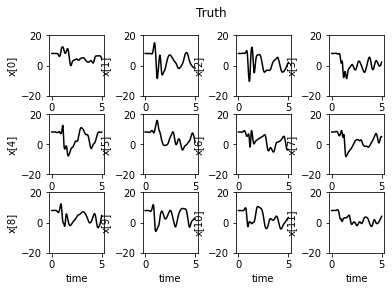

In [2]:
# The initial conditions
model = 'L96'
x0 = None # let it spin from rest (x_n(t=0) = F, for all n )
tmax = 5
Nx = 12
t, xt = lorenz96(tmax, x0, Nx) # Nx>=12
plotL96(t, xt, Nx)

# imperfect initial guess for our DA experiments
forc = 8.0
aux1 = forc * np.ones(Nx)
aux2 = range(Nx)
x0guess = aux1 + ((-1)*np.ones(Nx))**aux2

## 3. Generate observations

We now generate the observations by adding noise to selected variables at selected times.  We don’t have observations for every variable, as in real life; in our example, we will have observations for every second variable. The variables are observed at every 10 time steps. The observations are shown with red dots. 

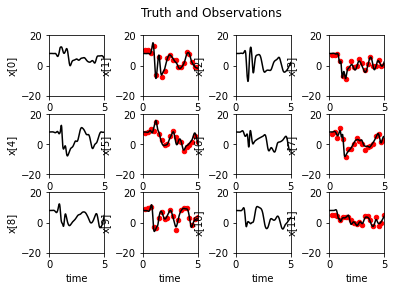

In [3]:
### 2. The observations
# Decide what variables to observe
obsgrid = '1010'
H, observed_vars = createH(obsgrid, model, Nx)
period_obs = 10
var_obs = 2

# Generating the observations
seed = 1
tobs, y, R = gen_obs(t, xt, period_obs, H, var_obs, seed)
plotL96obs(t, xt, Nx, tobs, y, observed_vars)

## 4. Ensemble size

In the experiments, we show the analysis for each ensemble member and their mean. The root mean square error of the ensemble mean is compared to the ensemble spread: a good match means that we can trust the ensemble and the uncertainty is estimated well,  whereas a spread smaller than the root mean square error signals that the uncertainty is underestimated, and a spread larger than the root mean square error signals the uncertainty is overestimated.

Recall that an assimilation is performed at every observation time and background is generated for every assimilation. 

Change the size of the ensemble (M), for example set M=2, M=10, M=100. How do the analysis mean and the root mean squared error change? What happens to the ensemble spread? Note the different scales for the root mean squared error. 

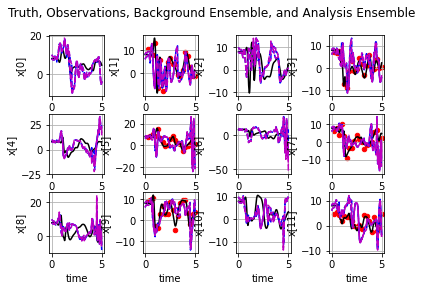

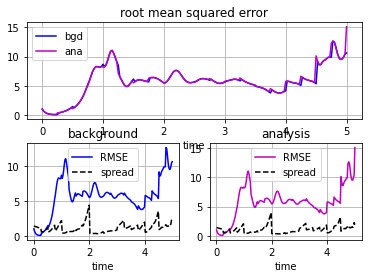

In [4]:
### 3. Data assimilation using KFa (SEnKF, LSEnKF and ETKF)
# No LETKF since R-localisation is extremely slow without parallel implementation    
rho = 0.1
M = 2
lam = 2
loctype = 'GC'
met = 'SEnKF' 
Xb,xb,Xa,xa,locmatrix = kfs_lor96(x0guess,t,tobs,y,H,R,rho,M,met,lam,loctype)
plotL96DA_kf(t,xt,tobs,y,Nx,observed_vars,Xb,xb,Xa,xa)

rmse_step=1
rmseb,spreadb = rmse_spread(xt,xb,Xb,rmse_step)
rmsea,spreada = rmse_spread(xt,xa,Xa,rmse_step)
plotRMSP(t,rmseb,rmsea,spreadb,spreada)

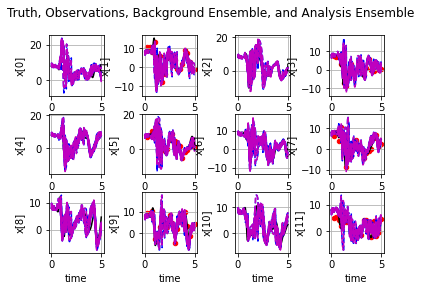

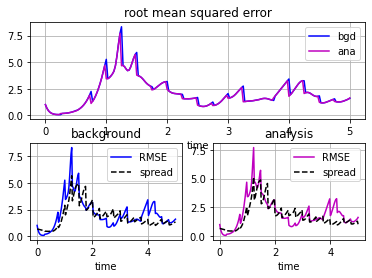

In [5]:
M = 10
 
Xb,xb,Xa,xa,locmatrix = kfs_lor96(x0guess,t,tobs,y,H,R,rho,M,met,lam,loctype)
plotL96DA_kf(t,xt,tobs,y,Nx,observed_vars,Xb,xb,Xa,xa)

rmse_step=1
rmseb,spreadb = rmse_spread(xt,xb,Xb,rmse_step)
rmsea,spreada = rmse_spread(xt,xa,Xa,rmse_step)
plotRMSP(t,rmseb,rmsea,spreadb,spreada)

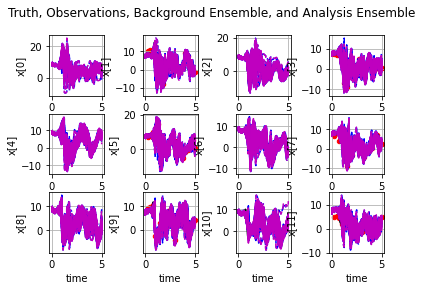

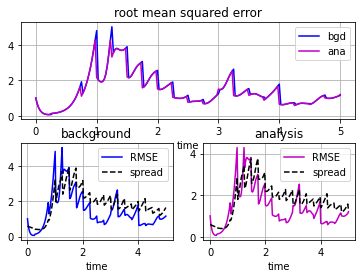

In [6]:
M = 100
 
Xb,xb,Xa,xa,locmatrix = kfs_lor96(x0guess,t,tobs,y,H,R,rho,M,met,lam,loctype)
plotL96DA_kf(t,xt,tobs,y,Nx,observed_vars,Xb,xb,Xa,xa)

rmse_step=1
rmseb,spreadb = rmse_spread(xt,xb,Xb,rmse_step)
rmsea,spreada = rmse_spread(xt,xa,Xa,rmse_step)
plotRMSP(t,rmseb,rmsea,spreadb,spreada)

## 5. Conclusions

We performed an analysis using the Stochastic Ensemble Kalman filter. Different ensemble sizes were used and we observed its effect on the analysis: a small ensemble may lead to an analysis of poor quality and incorrect uncertainty estimates.

## Acknowledgements

This code has been created by  authors from the [Data Assimilation Research Centre](https://research.reading.ac.uk/met-darc/) (DARC) at the [University of Reading](https://www.reading.ac.uk), funded in part by the [Data Assimilation for the REsilient City](https://research.reading.ac.uk/dare/) (DARE) project (EPSRC EP/P002331/1) and the NERC [National Centre for Earth Observation](https://www.nceo.ac.uk) (NCEO).